**Project Description**

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


**1. Importing all required libraries**

In [817]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

**2. Reading data from csv file and loaded into jupyter notebook for further evaluation and analysis.**

In [818]:
data = pd.read_csv('temperature.csv')
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [819]:
df = pd.DataFrame(data)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


**3. Exploratory Data Analysis (EDA)**

In [820]:
df.shape

(7752, 25)

We have 7752 rows and 25 columns in the dataset.

In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We have float datatypes for all the variables except for Date.

In [822]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

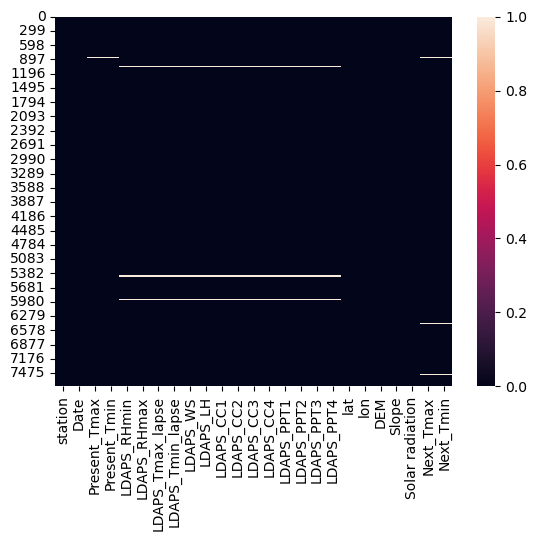

In [823]:
sns.heatmap(df.isnull())

From above heatmap, we can see there are some missing values present in the dataset.
>>As these values are small in size, we can drop them and it will not make any significant difference in prediction and analysis.

In [824]:
df.dropna(inplace=True)

In [825]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We have successfully removed null values from the dataset.

In [826]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


From above, we can see all the information related to each column..
>> There are some outliers in the dataset. LDAPS_WS, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 variables have outliers present as there is large gap between 50% and max range

We can convert date datatype and splitting into days, month and year.

In [827]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Year'] = df['Date'].apply(lambda x:x.year)

In [828]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


We have latitude and logitude data available in our dataset. So we can use it to find geographical location using reverse geocoder.

In [829]:
!pip install reverse_geocoder

In [830]:
import reverse_geocoder as rg
import pprint

In [831]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)

geo_names = pd.DataFrame(geodata).transpose()
print(geo_names)

                                                      0
0     {'lat': '37.566', 'lon': '126.9784', 'name': '...
1     {'lat': '37.566', 'lon': '126.9784', 'name': '...
2     {'lat': '37.566', 'lon': '126.9784', 'name': '...
3     {'lat': '37.566', 'lon': '126.9784', 'name': '...
4     {'lat': '37.5986', 'lon': '127.1394', 'name': ...
...                                                 ...
7583  {'lat': '37.566', 'lon': '126.9784', 'name': '...
7584  {'lat': '37.43861', 'lon': '127.13778', 'name'...
7585  {'lat': '37.47722', 'lon': '126.86639', 'name'...
7586  {'lat': '37.47722', 'lon': '126.86639', 'name'...
7587  {'lat': '37.566', 'lon': '126.9784', 'name': '...

[7588 rows x 1 columns]


So using geocoder we got states and city with respect to their longitude and latitude.

In [832]:
df['State']=geo_names[0].apply(lambda x:x.get('admin1'))

In [833]:
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [834]:
df.drop(['lat','lon'], axis=1, inplace=True)

In [835]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013,Seoul,Seoul
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013,Seoul,Seoul
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013,Seoul,Seoul
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013,Seoul,Seoul
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013,Gyeonggi-do,Guri-si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017,NaN,NaN
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017,NaN,NaN
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017,NaN,NaN
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017,NaN,NaN


We have successfully got states and city names and have added them to our dataset and dropped longitude and latitude from the dataset. 

In [836]:
df.dropna(inplace=True)

In [837]:
df.drop(['Date'], axis=1, inplace = True)

In [838]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
State               0
City                0
dtype: int64

In [839]:
df.shape

(7432, 27)

<Axes: >

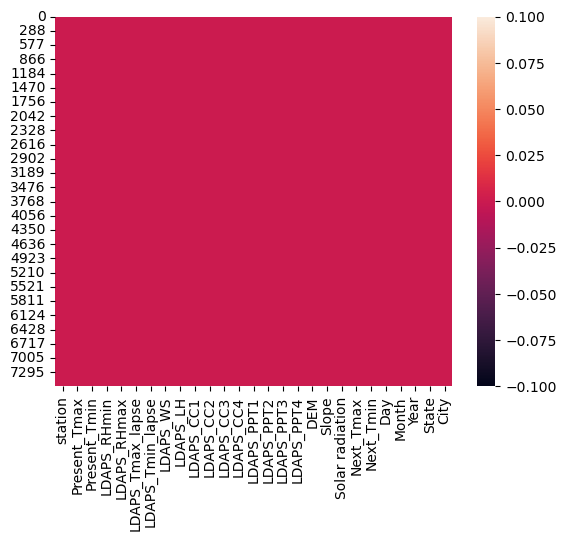

In [840]:
sns.heatmap(df.isnull())

We can see that we don't have any null / missing values present in our datset.

**4. Visualisation**

In [841]:
# Distplot

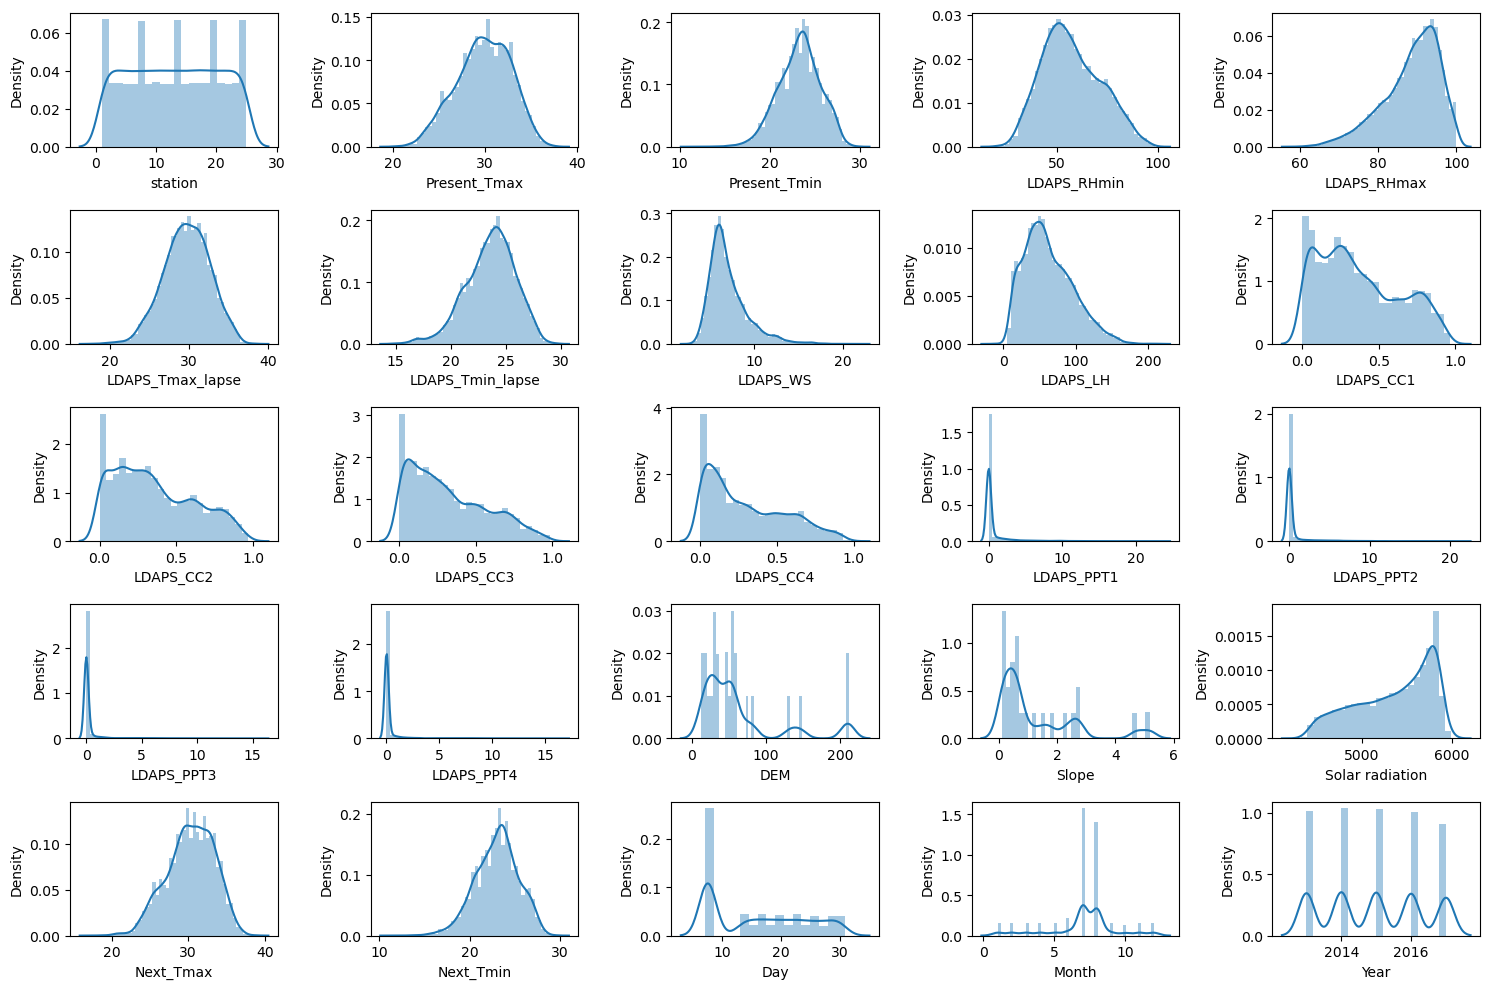

In [842]:
plt.figure(figsize = (15,10))
plot = 1
for i in df:
    if plot <= 25:
        ax = plt.subplot(5,5, plot)
        sns.distplot(df[i])
    plot += 1
plt.tight_layout()

In [843]:
# lets build a plot to show maximum temperature for each station

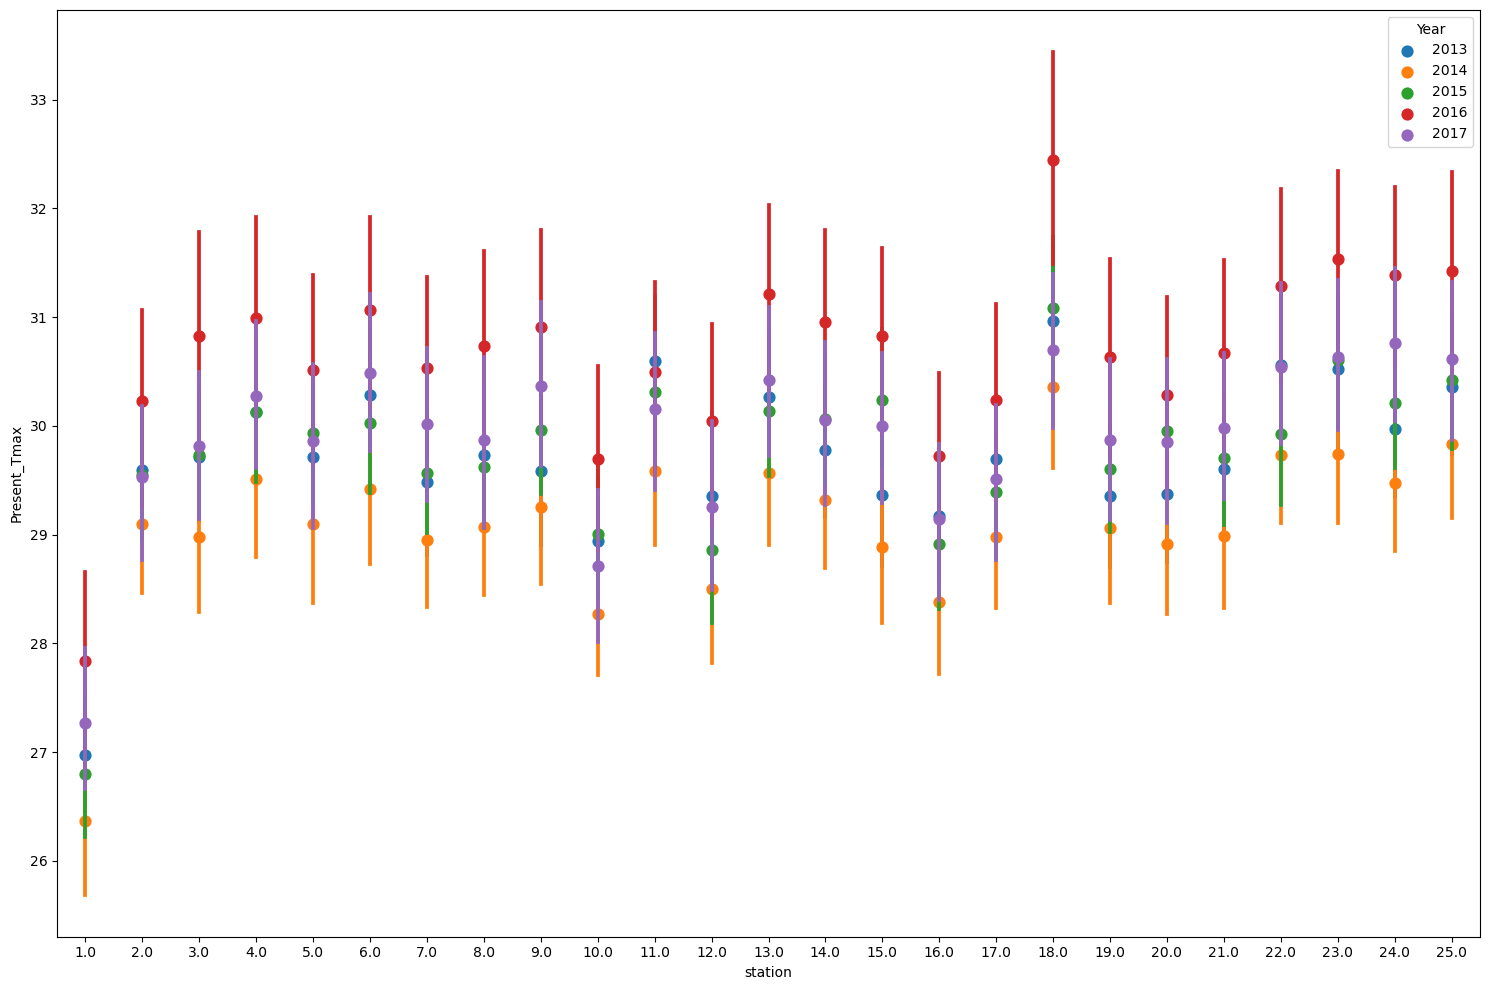

In [844]:
plt.figure(figsize=(15,10))
sns.pointplot(data = df, x = 'station', y = 'Present_Tmax', hue = 'Year', join = False)
plt.tight_layout()

From above observation, we can see in 2016, temperature was highest compared to 2017.

In [845]:
# Lineplot to show minimum temperature for each station over the years.

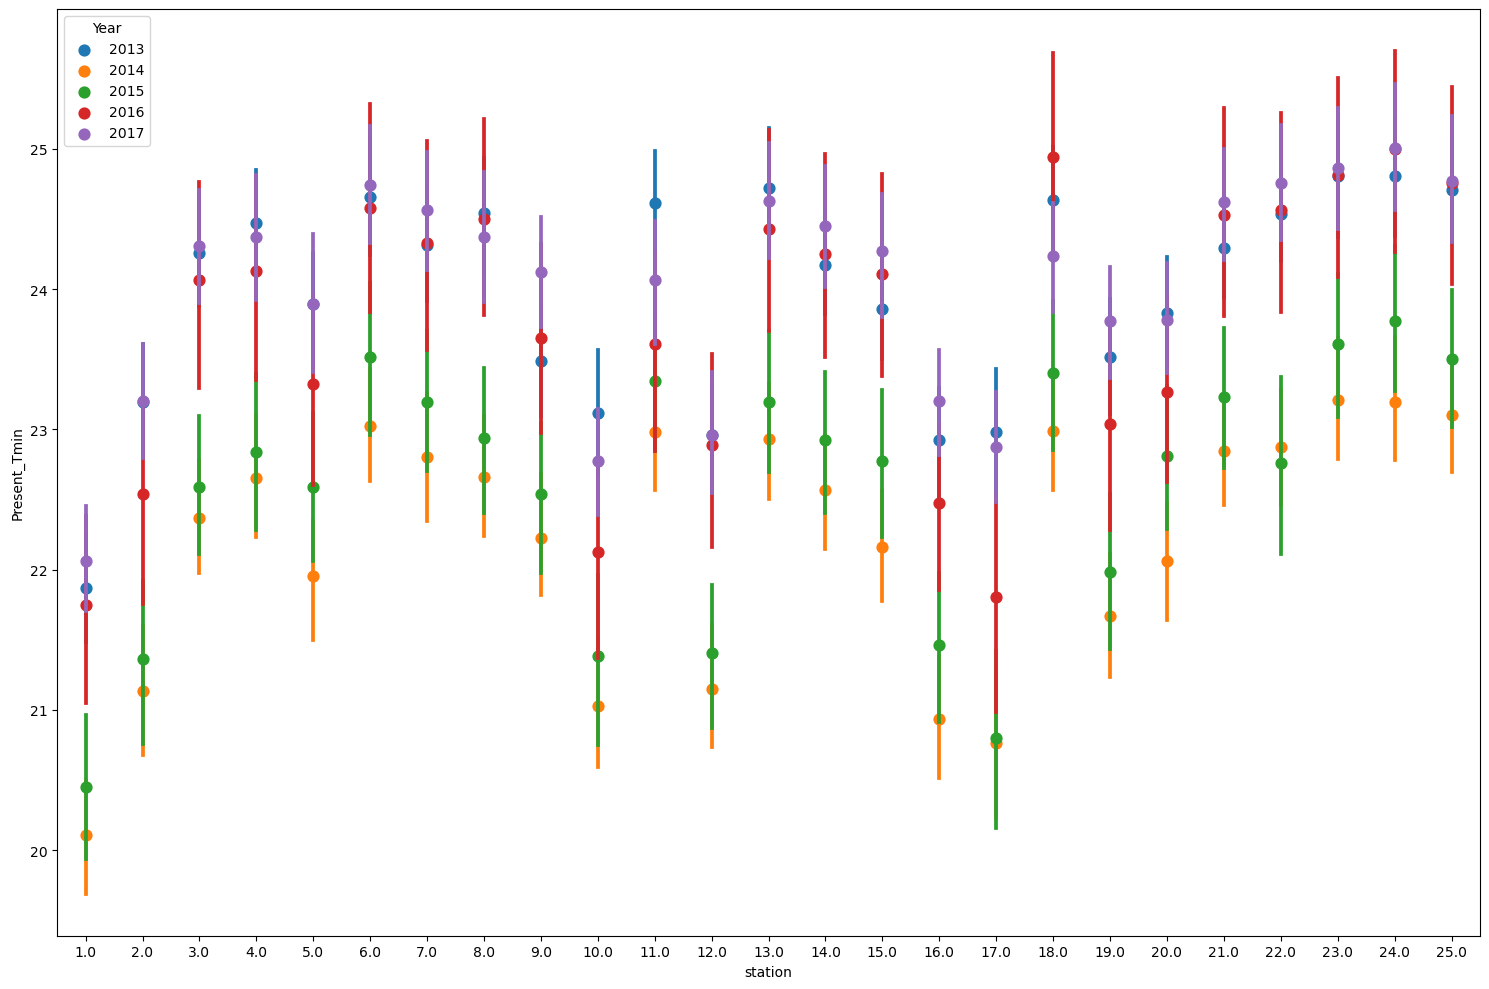

In [846]:
plt.figure(figsize=(15,10))
sns.pointplot(data = df, x = 'station', y = 'Present_Tmin', hue = 'Year', join = False)
plt.tight_layout()

From above observation, we can see temperature was lowest in 2014 compared to oter years.

Our output variables are Next_Tmax and Next_Tmin

In [847]:
# Present minimum temperature and present maximum temperature

<Axes: xlabel='Present_Tmax', ylabel='Density'>

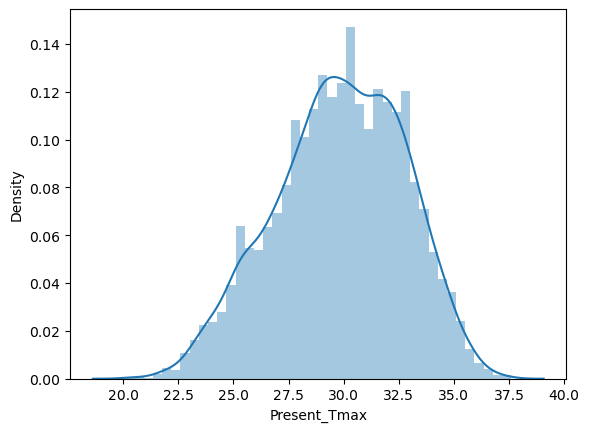

In [848]:
sns.distplot(df['Present_Tmax'])

From above distplot, we can see present maximum temperature is ranging between 25 to 35 degrees.

<Axes: xlabel='Present_Tmin', ylabel='Density'>

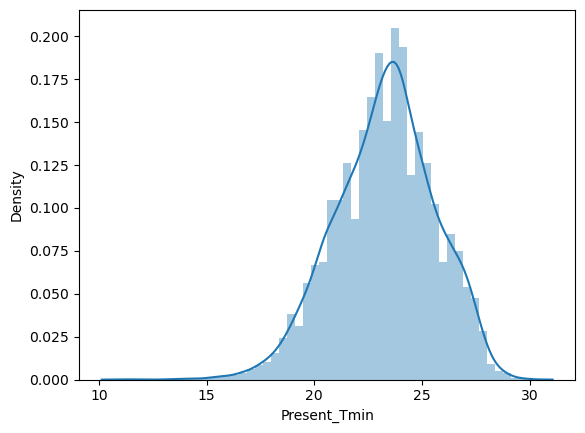

In [849]:
sns.distplot(df['Present_Tmin'])

From above distplot, we can see present minimum temperature ranging between 20 to 30 degrees.

In [850]:
# Next_Tmax Vs station

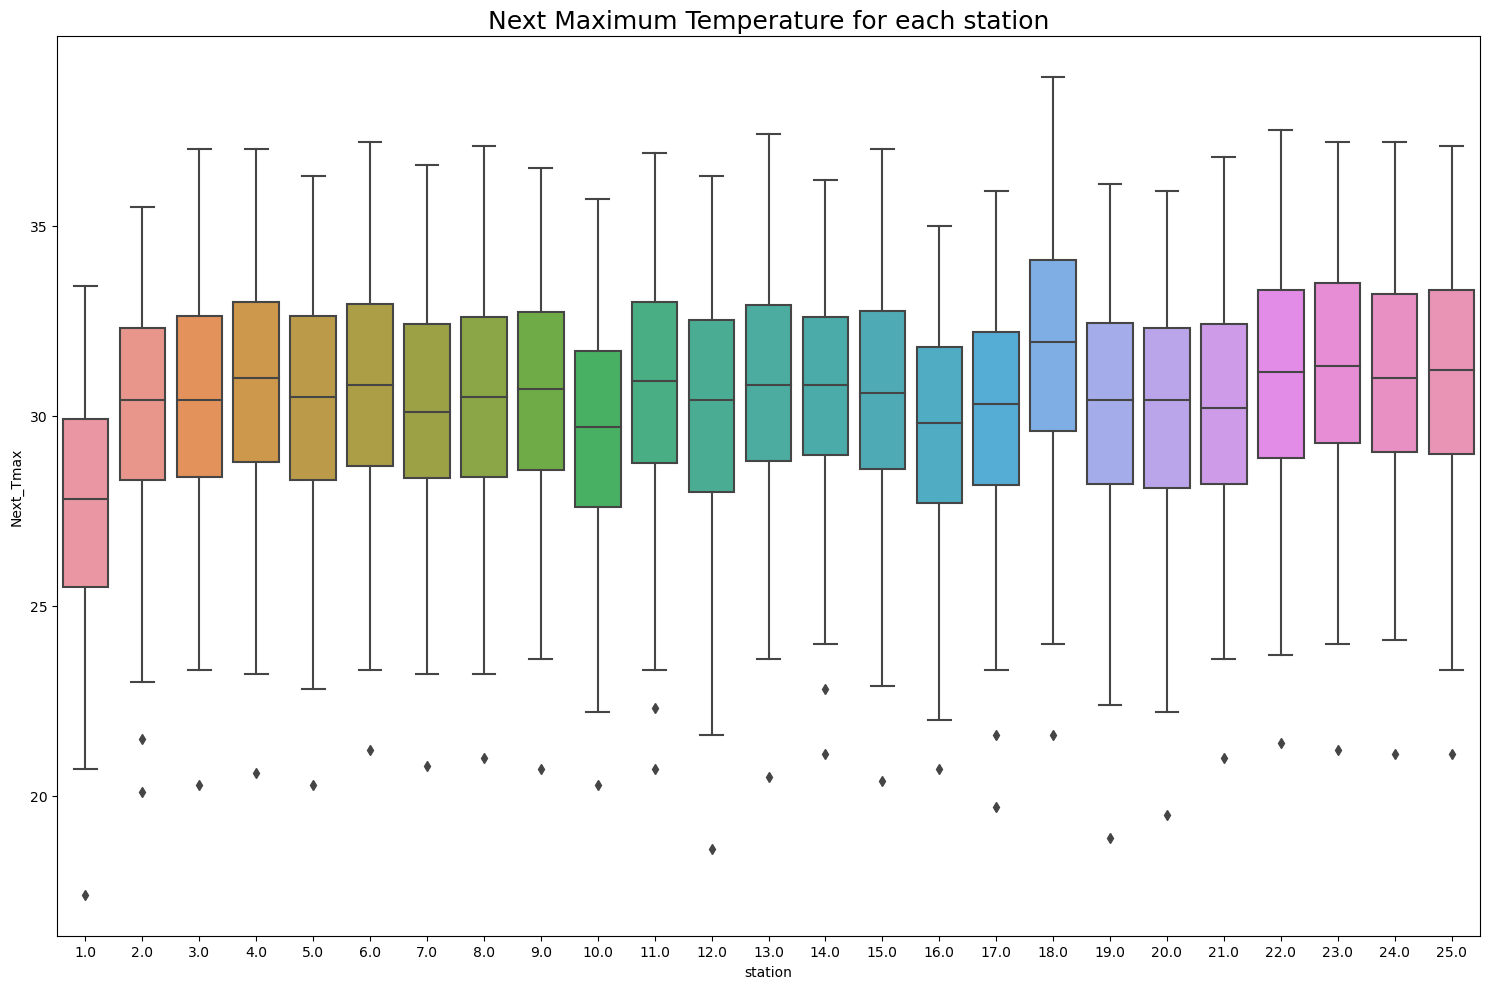

In [851]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = df['station'], y = df['Next_Tmax'])
plt.title('Next Maximum Temperature for each station', fontsize = 18)
plt.tight_layout()

In [852]:
# Next_Tmax Vs station

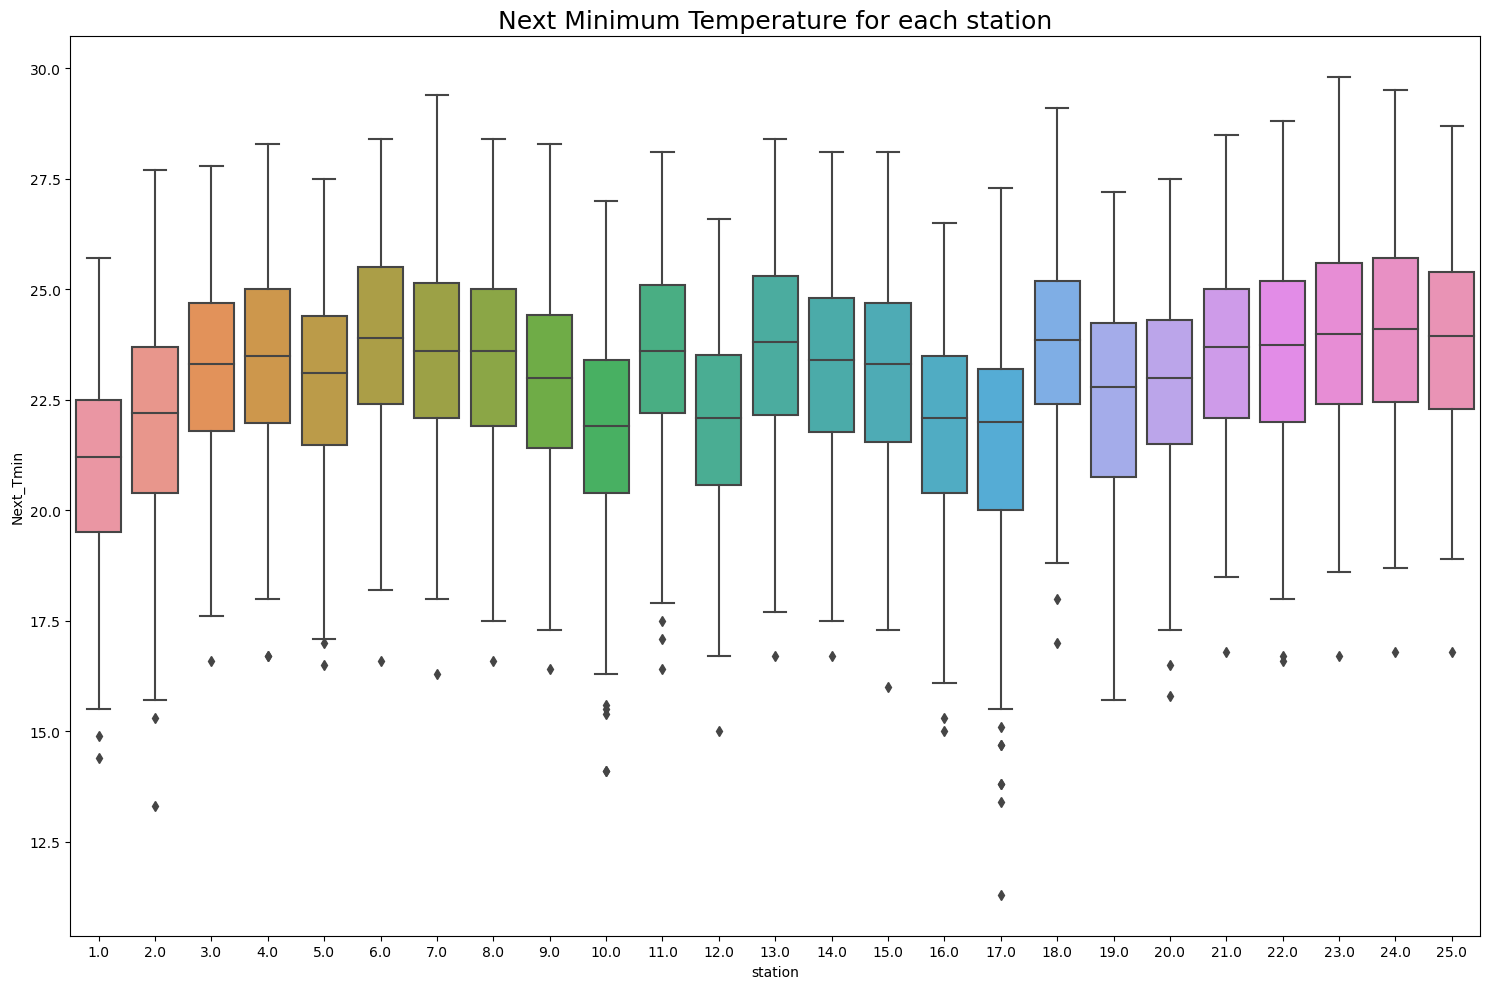

In [853]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = df['station'], y = df['Next_Tmin'])
plt.title('Next Minimum Temperature for each station', fontsize = 18)
plt.tight_layout()

From above graphs,
>> We can see station 18 has the highest temperature compared to other stations.
>> Also, at station 17, we can see maximum difference in temprature.

In [854]:
# Solar Radiation Vs Cloud cover 

<Axes: xlabel='LDAPS_CC1', ylabel='Solar radiation'>

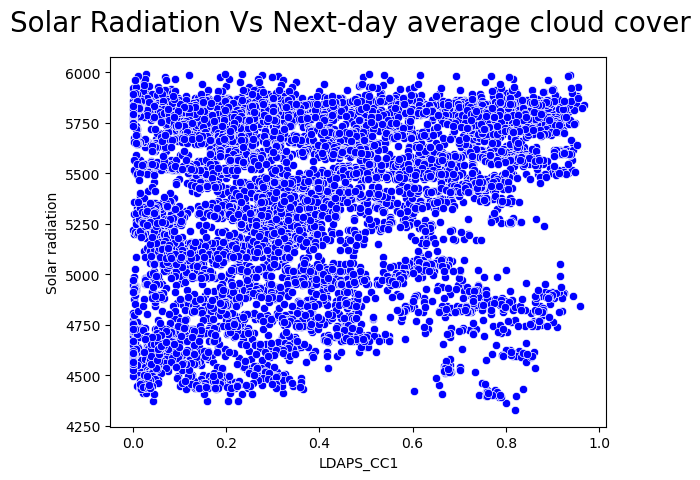

In [855]:
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20)
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df, color = 'b')

<Axes: xlabel='LDAPS_CC2', ylabel='Solar radiation'>

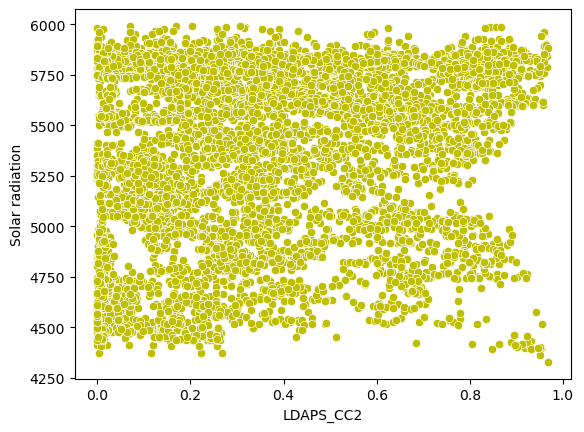

In [856]:
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df, color = 'y')

<Axes: xlabel='LDAPS_CC3', ylabel='Solar radiation'>

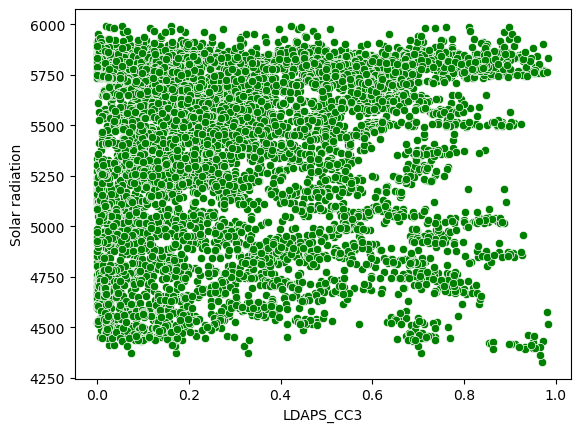

In [857]:
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df, color = 'g')

<Axes: xlabel='LDAPS_CC4', ylabel='Solar radiation'>

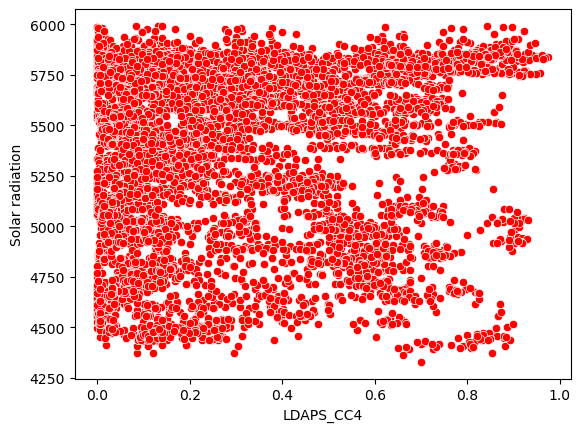

In [858]:
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color = 'r')

We can see cloud cover more than .5 has highe impact on solar radiation.

In [859]:
# Precipitation VS Solar radiation

<Axes: xlabel='Solar radiation', ylabel='LDAPS_PPT1'>

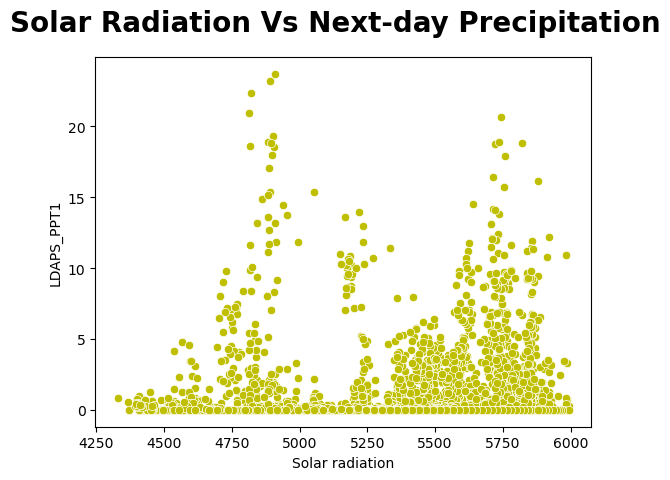

In [860]:
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color='y')

<Axes: xlabel='Solar radiation', ylabel='LDAPS_PPT2'>

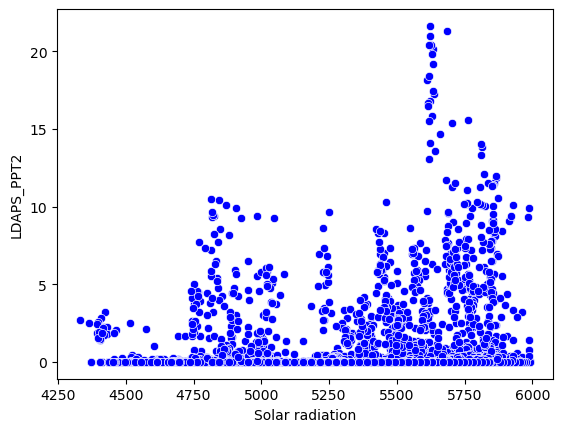

In [861]:
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='b')

<Axes: xlabel='Solar radiation', ylabel='LDAPS_PPT3'>

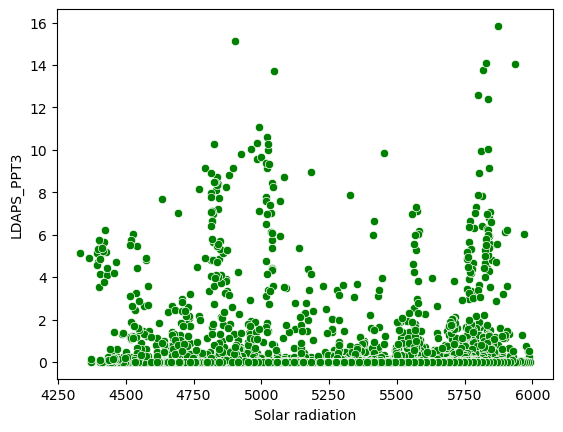

In [862]:
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='g')

<Axes: xlabel='Solar radiation', ylabel='LDAPS_PPT4'>

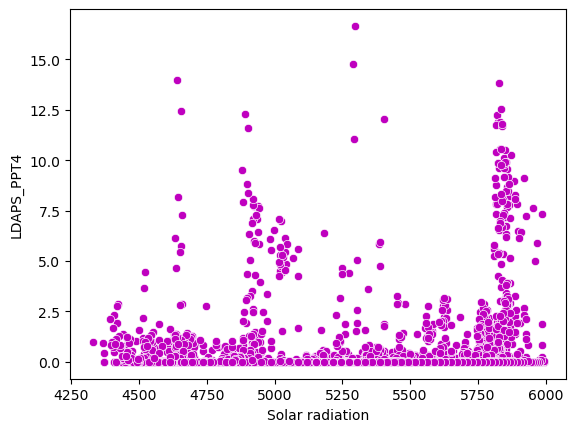

In [863]:
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color='m')

From above scatterplots we can see, solar radiation value greater than 5000 has higher amount of precipitation. 
> So from this we can conclude than higher pereception value contributes to higher cloud cover.

In [864]:
# Next maximum temperature vs Cloud cover

<Axes: title={'center': 'Next Maximum Temeprature Vs Cloud Cover'}, xlabel='LDAPS_PPT1', ylabel='Next_Tmax'>

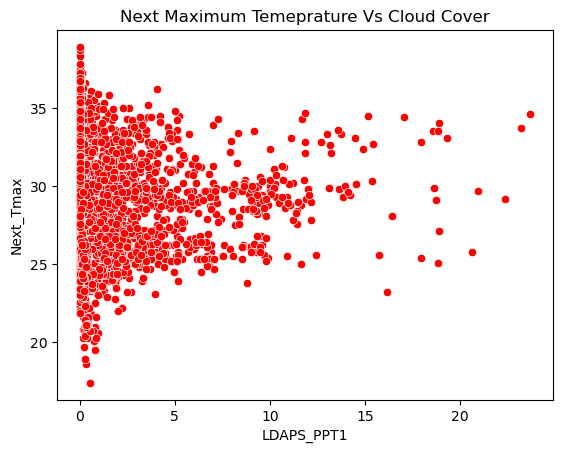

In [865]:
plt.title('Next Maximum Temeprature Vs Cloud Cover')
sns.scatterplot(data=df, y = df['Next_Tmax'], x = df['LDAPS_PPT1'], color = 'r')

<Axes: title={'center': 'Next Maximum Temeprature Vs Cloud Cover'}, xlabel='LDAPS_PPT2', ylabel='Next_Tmax'>

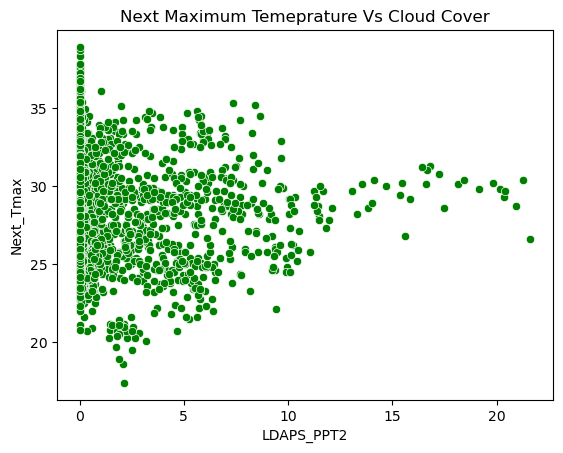

In [866]:
plt.title('Next Maximum Temeprature Vs Cloud Cover')
sns.scatterplot(data=df, y = df['Next_Tmax'],x = df['LDAPS_PPT2'], color= 'g')

<Axes: title={'center': 'Next Maximum Temeprature Vs Cloud Cover'}, xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

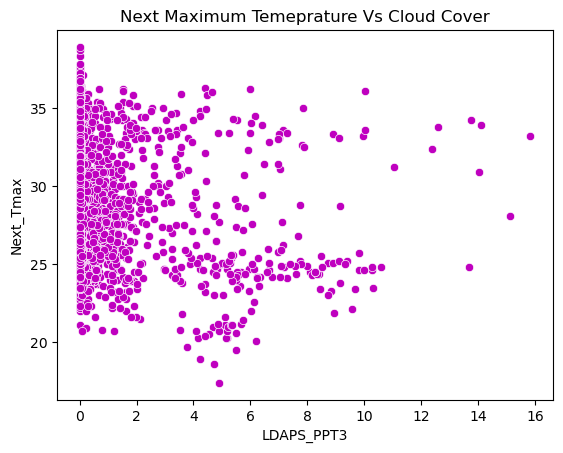

In [867]:
plt.title('Next Maximum Temeprature Vs Cloud Cover')
sns.scatterplot(data=df, y = df['Next_Tmax'], x = df['LDAPS_PPT3'], color = 'm')

<Axes: title={'center': 'Next Maximum Temeprature Vs Cloud Cover'}, xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

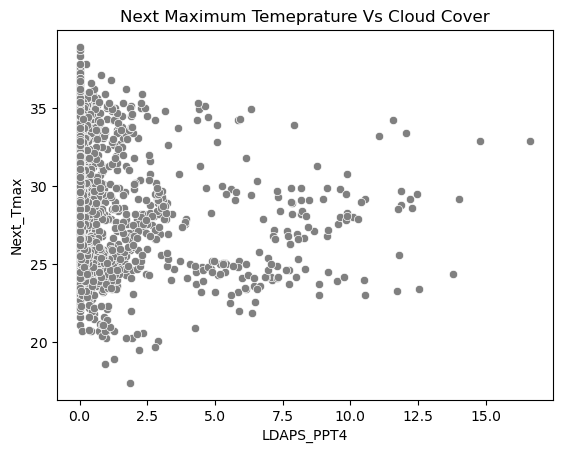

In [868]:
plt.title('Next Maximum Temeprature Vs Cloud Cover')
sns.scatterplot(data=df, y = df['Next_Tmax'], x = df['LDAPS_PPT4'], color= 'grey')

From above we can see that, next Maximum temperature decreases as cloud cover increases.

In [869]:
# Next day minimum temperature Vs cloud cover

<Axes: title={'center': 'Next Maximum Temeprature Vs Cloud Cover'}, xlabel='LDAPS_PPT1', ylabel='Next_Tmin'>

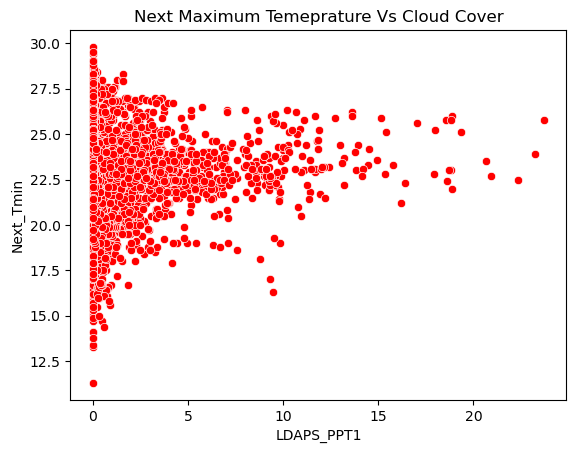

In [870]:
plt.title('Next Maximum Temeprature Vs Cloud Cover')
sns.scatterplot(data=df, y = df['Next_Tmin'], x = df['LDAPS_PPT1'], color= 'r')

<Axes: title={'center': 'Next Maximum Temeprature Vs Cloud Cover'}, xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

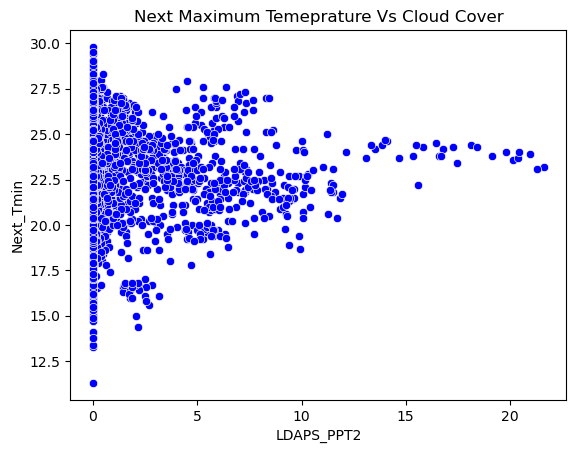

In [871]:
plt.title('Next Maximum Temeprature Vs Cloud Cover')
sns.scatterplot(data=df, y = df['Next_Tmin'], x = df['LDAPS_PPT2'], color= 'b')

<Axes: title={'center': 'Next Maximum Temeprature Vs Cloud Cover'}, xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

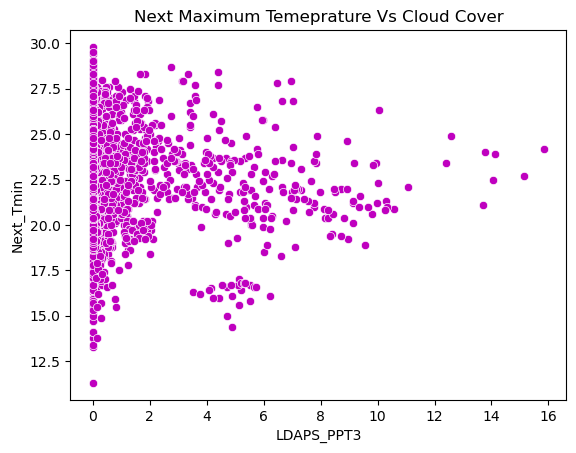

In [872]:
plt.title('Next Maximum Temeprature Vs Cloud Cover')
sns.scatterplot(data=df, y = df['Next_Tmin'], x = df['LDAPS_PPT3'], color= 'm')

<Axes: title={'center': 'Next Maximum Temeprature Vs Cloud Cover'}, xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

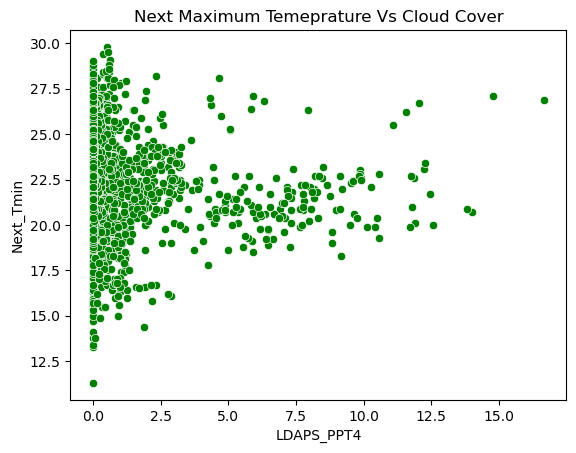

In [873]:
plt.title('Next Maximum Temeprature Vs Cloud Cover')
sns.scatterplot(data=df, y = df['Next_Tmin'], x = df['LDAPS_PPT4'], color= 'g')

We can hardly see any changes or effect of cloud cover with resepct to next minimum temperature.

In [874]:
# Next day minimum temperature Vs cloud cover

<Axes: xlabel='Month', ylabel='LDAPS_PPT1'>

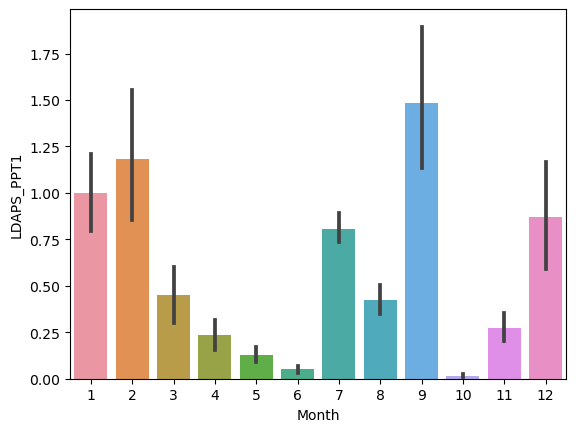

In [875]:
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'])

<Axes: xlabel='Month', ylabel='LDAPS_PPT2'>

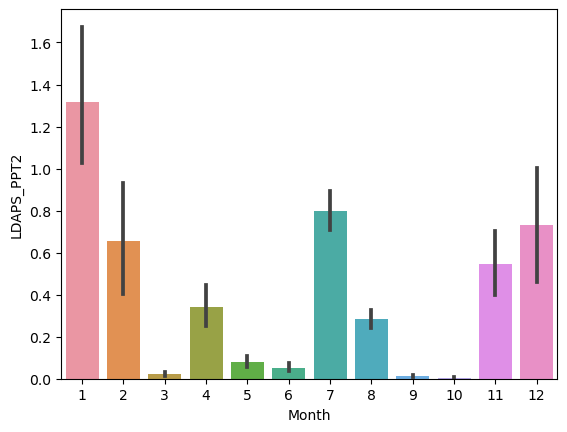

In [876]:
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'])

<Axes: xlabel='Month', ylabel='LDAPS_PPT3'>

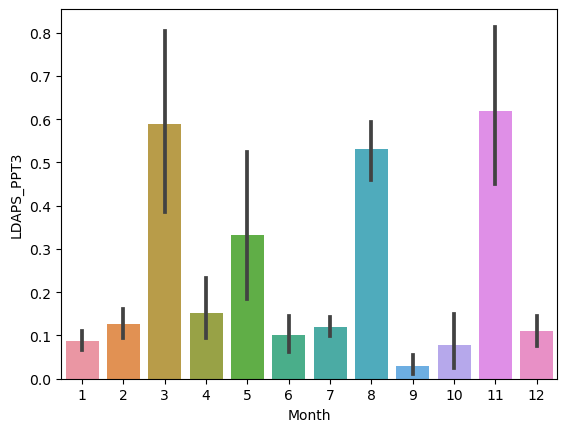

In [877]:
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'])

<Axes: xlabel='Month', ylabel='LDAPS_PPT4'>

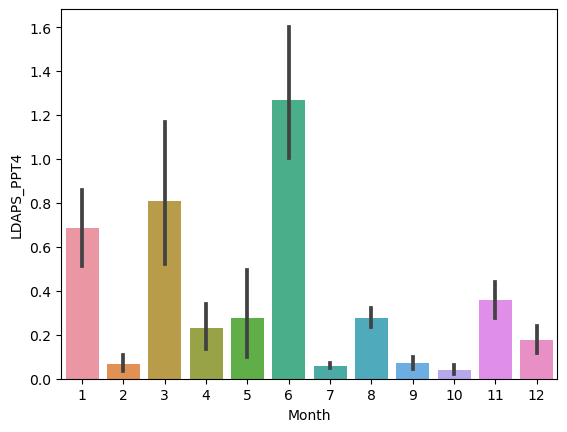

In [878]:
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'])

From above barplot, we can see highest precipitation observe in 9th, 1st, 11th, and 6th month.

In [879]:
# We will need to convert categorical data into numerical form using label encoder.

In [880]:
from sklearn.preprocessing import LabelEncoder

In [881]:
le = LabelEncoder()

In [882]:
df['State']= le.fit_transform(df['State'])
df['City']= le.fit_transform(df['City'])
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013,1,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013,1,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013,1,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013,1,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,9.0,28.7,23.9,42.926731,98.332764,29.027972,21.674105,5.644606,119.187221,0.175241,...,50.9312,0.4125,4701.743164,31.5,21.5,24,8,2017,1,6
7584,10.0,27.6,23.1,39.548191,95.042191,28.967789,21.177163,5.688959,75.633320,0.160829,...,208.5070,5.1782,4615.589355,31.1,19.7,24,8,2017,0,5
7585,11.0,29.1,25.2,30.830862,91.001320,31.414227,22.972323,6.142591,53.078167,0.102168,...,28.7000,0.6233,4696.113281,33.7,22.7,24,8,2017,0,4
7586,12.0,27.1,23.5,32.916492,91.953880,30.416499,21.894489,6.580618,19.497835,0.109945,...,132.1180,0.5931,4736.235840,30.6,21.4,24,8,2017,0,4


In [883]:
# Detecting and removing outliers

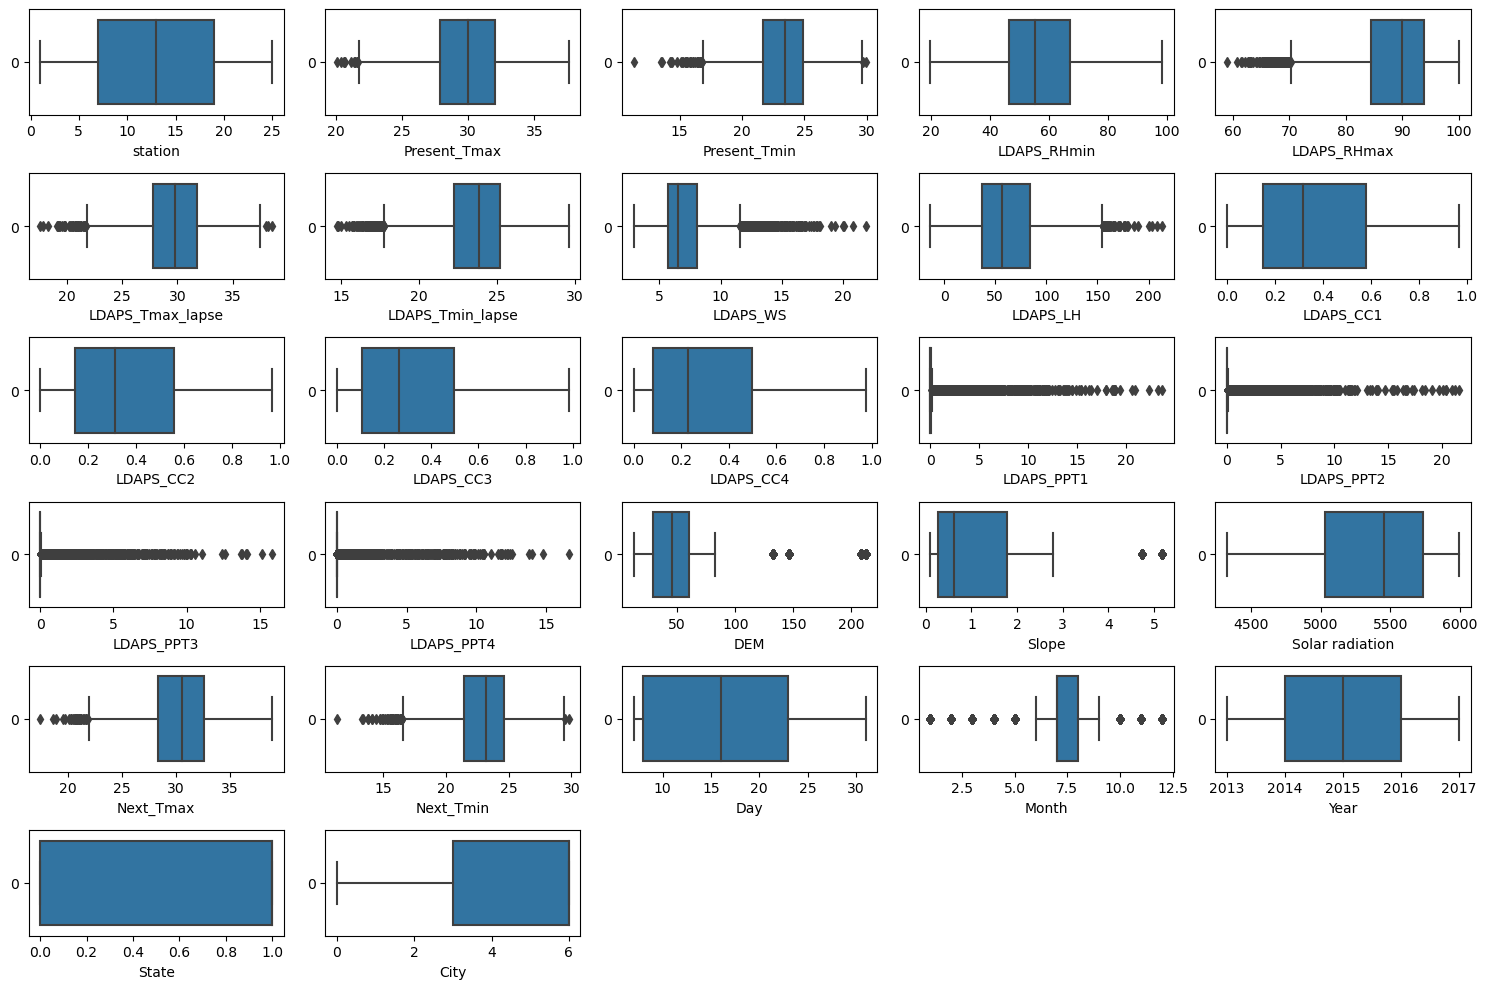

In [884]:
plt.figure(figsize=(15,10))
plot=1

for c in df:
    if plot <= 29:
        ax=plt.subplot(6,5,plot)
        sns.boxplot(df[c], orient = 'h')
        plt.xlabel(c)
    plot +=1
plt.tight_layout()

From above boxplot we can see some outliers present in the dataset.

In [885]:
from scipy.stats import zscore

In [886]:
z = np.abs(zscore(df))
z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
0,1.662777,0.382945,0.809039,0.080591,0.372334,0.561798,0.272084,0.131349,0.209022,0.521848,...,2.768732,1.111381,1.510719,0.397489,0.762471,1.706358,0.463655,1.397656,0.959123,0.812684
1,1.524220,0.710926,0.722976,0.333610,0.300839,0.051443,0.188163,0.647966,0.313193,0.554006,...,0.315944,0.543170,1.215716,0.058201,0.216548,1.706358,0.463655,1.397656,0.959123,0.812684
2,1.385663,0.608375,0.008558,0.580578,0.625764,0.134494,0.425712,0.443366,1.248365,0.615600,...,0.526819,0.723860,1.201974,0.253496,0.371370,1.706358,0.463655,1.397656,0.959123,0.812684
3,1.247106,0.745109,0.051589,0.079491,1.122338,0.001026,0.129166,0.667146,0.097966,0.588819,...,0.298390,0.929089,1.186242,0.448792,0.539346,1.706358,0.463655,1.397656,0.959123,0.812684
4,1.108549,0.540008,0.593882,0.063294,0.238015,0.202870,0.057402,0.628202,1.357361,0.836367,...,0.494951,0.549436,1.192418,0.286045,0.216548,1.706358,0.463655,1.397656,1.042619,0.879314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,0.554321,0.382945,0.266746,0.978981,1.380719,0.232542,0.868764,0.669641,1.691951,0.745549,...,0.202389,0.617194,1.571352,0.383693,0.636489,0.969395,0.420698,1.470003,0.959123,0.812684
7584,0.415764,0.758963,0.077505,1.212514,0.920910,0.253316,1.091234,0.649310,0.393332,0.800466,...,2.698267,2.855039,1.777008,0.253496,1.392383,0.969395,0.420698,1.470003,1.042619,0.248685
7585,0.277207,0.246211,0.826154,1.815075,0.356258,0.591144,0.287579,0.441364,0.279181,1.023989,...,0.611621,0.463608,1.584791,1.099777,0.132559,0.969395,0.420698,1.470003,1.042619,0.315314
7586,0.138650,0.929880,0.094620,1.670912,0.489364,0.246749,0.770103,0.240572,1.280424,0.994358,...,1.292098,0.485611,1.489016,0.090750,0.678483,0.969395,0.420698,1.470003,1.042619,0.315314


In [887]:
threshold = 3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7414, 7415, 7415]), array([ 7, 14, 14, ..., 13,  7, 13]))


In [888]:
dfn = df[(z<3).all(axis=1)]
dfn

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013,1,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013,1,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013,1,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013,1,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,9.0,28.7,23.9,42.926731,98.332764,29.027972,21.674105,5.644606,119.187221,0.175241,...,50.9312,0.4125,4701.743164,31.5,21.5,24,8,2017,1,6
7584,10.0,27.6,23.1,39.548191,95.042191,28.967789,21.177163,5.688959,75.633320,0.160829,...,208.5070,5.1782,4615.589355,31.1,19.7,24,8,2017,0,5
7585,11.0,29.1,25.2,30.830862,91.001320,31.414227,22.972323,6.142591,53.078167,0.102168,...,28.7000,0.6233,4696.113281,33.7,22.7,24,8,2017,0,4
7586,12.0,27.1,23.5,32.916492,91.953880,30.416499,21.894489,6.580618,19.497835,0.109945,...,132.1180,0.5931,4736.235840,30.6,21.4,24,8,2017,0,4


In [889]:
df.shape

(7432, 27)

In [890]:
dfn.shape

(6622, 27)

We have successfuly removed outliers from our dataset.

In [891]:
# Checking for skewness

In [892]:
dfn.skew()

station             0.003565
Present_Tmax       -0.273651
Present_Tmin       -0.174036
LDAPS_RHmin         0.331854
LDAPS_RHmax        -0.687183
LDAPS_Tmax_lapse   -0.103133
LDAPS_Tmin_lapse   -0.312367
LDAPS_WS            1.094696
LDAPS_LH            0.564394
LDAPS_CC1           0.586001
LDAPS_CC2           0.500898
LDAPS_CC3           0.697300
LDAPS_CC4           0.714014
LDAPS_PPT1          3.694404
LDAPS_PPT2          4.789221
LDAPS_PPT3          5.457173
LDAPS_PPT4          5.940602
DEM                 1.756725
Slope               1.582863
Solar radiation    -0.544842
Next_Tmax          -0.274917
Next_Tmin          -0.167291
Day                 0.290654
Month              -0.658305
Year                0.047300
State              -0.079210
City               -0.964055
dtype: float64

From above we can see there is skewness present in our dataset and we will need to address it for our model to predict the result accurately.

In [893]:
# addressing skewness for better prediction using log tranasformer

In [894]:
var = ['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

In [895]:
for columns in var:
    if dfn.skew().loc[columns]>0.55:
        dfn[columns]=np.log1p(dfn[columns])

We have reduced skewnwess 

In [896]:
dfn.skew()

station             0.003565
Present_Tmax       -0.273651
Present_Tmin       -0.174036
LDAPS_RHmin         0.331854
LDAPS_RHmax        -0.687183
LDAPS_Tmax_lapse   -0.103133
LDAPS_Tmin_lapse   -0.312367
LDAPS_WS            0.479471
LDAPS_LH           -0.612209
LDAPS_CC1           0.586001
LDAPS_CC2           0.500898
LDAPS_CC3           0.436337
LDAPS_CC4           0.498100
LDAPS_PPT1          2.708739
LDAPS_PPT2          3.585335
LDAPS_PPT3          4.187279
LDAPS_PPT4          4.615777
DEM                 0.448012
Slope               0.841225
Solar radiation    -0.544842
Next_Tmax          -0.274917
Next_Tmin          -0.167291
Day                 0.290654
Month              -0.658305
Year                0.047300
State              -0.079210
City               -0.964055
dtype: float64

In [897]:
# Checking for correlation

In [898]:
dfn.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
station,1.000000,0.112281,0.138667,-0.065369,-0.177591,0.069427,0.112469,0.025882,-0.131078,0.010662,...,-0.310059,-0.127312,-0.026481,0.108245,0.137804,0.001036,0.002245,0.002055,-0.125977,-0.181224
Present_Tmax,0.112281,1.000000,0.600912,-0.178907,-0.312937,0.532210,0.611205,-0.087476,0.104147,-0.302868,...,-0.146296,-0.099080,-0.094172,0.581188,0.609229,-0.118733,0.029475,0.123535,-0.015415,-0.013361
Present_Tmin,0.138667,0.600912,1.000000,0.126269,-0.056903,0.419663,0.753056,0.032314,-0.014439,0.080466,...,-0.253585,-0.156900,-0.028247,0.418665,0.776354,-0.044959,-0.012426,0.137473,-0.021044,-0.010164
LDAPS_RHmin,-0.065369,-0.178907,0.126269,1.000000,0.551614,-0.601246,0.090778,0.209959,0.033029,0.571976,...,0.067476,0.106356,0.223363,-0.473755,0.099474,-0.044473,-0.067338,0.033768,-0.023969,-0.034234
LDAPS_RHmax,-0.177591,-0.312937,-0.056903,0.551614,1.000000,-0.409348,-0.172272,0.066688,0.315200,0.407049,...,0.171811,0.214455,0.142364,-0.324325,-0.121930,0.002028,-0.046683,-0.130319,-0.014732,-0.023198
LDAPS_Tmax_lapse,0.069427,0.532210,0.419663,-0.601246,-0.409348,1.000000,0.606791,-0.191735,-0.029390,-0.436876,...,-0.131946,-0.138095,-0.026506,0.811507,0.537389,-0.116247,-0.002702,0.096901,0.013288,0.019699
LDAPS_Tmin_lapse,0.112469,0.611205,0.753056,0.090778,-0.172272,0.606791,1.000000,-0.028213,-0.151276,0.016285,...,-0.186865,-0.181134,0.048651,0.530169,0.868172,-0.105725,-0.007892,0.099785,-0.001016,0.003358
LDAPS_WS,0.025882,-0.087476,0.032314,0.209959,0.066688,-0.191735,-0.028213,1.000000,-0.046686,0.230858,...,0.126402,0.110317,0.151379,-0.244503,0.009536,-0.057237,-0.083281,-0.129897,0.000018,-0.017137
LDAPS_LH,-0.131078,0.104147,-0.014439,0.033029,0.315200,-0.029390,-0.151276,-0.046686,1.000000,-0.071909,...,0.100712,0.140809,-0.029904,0.120302,-0.059657,-0.009644,-0.029829,0.041093,-0.039047,-0.036252
LDAPS_CC1,0.010662,-0.302868,0.080466,0.571976,0.407049,-0.436876,0.016285,0.230858,-0.071909,1.000000,...,-0.031610,-0.035223,0.234115,-0.473317,-0.012402,-0.020990,-0.106882,-0.055449,-0.011107,-0.013824


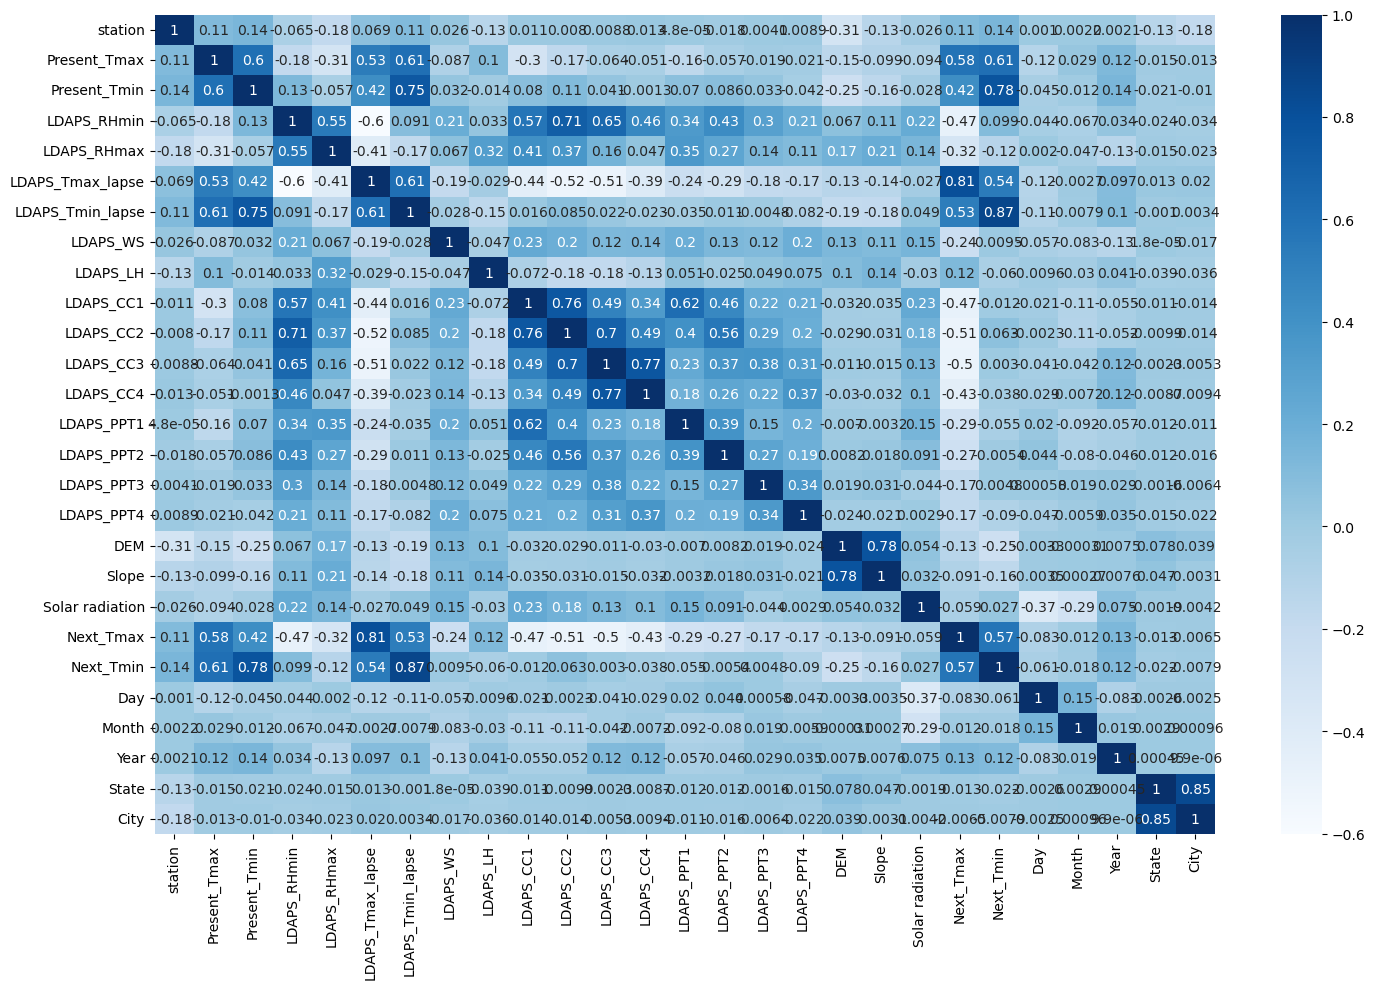

In [899]:
plt.figure(figsize = (15,10))
sns.heatmap(dfn.corr(), annot = True, cmap = 'Blues')
plt.tight_layout()

**5. Machine Learning Model Building**

In [900]:
# Splitting dataset into x and y variables

In [901]:
dfn.dropna(inplace=True)

In [902]:
x = dfn.drop(['Next_Tmax'], axis = 1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year,State,City
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.233947,...,0.0,5.362864,1.331046,5992.895996,21.2,30,6,2013,1,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.225508,...,0.0,3.823463,0.414821,5869.312500,22.5,30,6,2013,1,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.209344,...,0.0,3.535344,0.235941,5863.555664,23.9,30,6,2013,1,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.216372,...,0.0,3.844087,1.262657,5856.964844,24.3,30,6,2013,1,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.151407,...,0.0,3.584574,0.409125,5859.552246,22.5,30,6,2013,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,9.0,28.7,23.9,42.926731,98.332764,29.027972,21.674105,1.893805,4.789051,0.175241,...,0.0,3.949920,0.345361,4701.743164,21.5,24,8,2017,1,6
7584,10.0,27.6,23.1,39.548191,95.042191,28.967789,21.177163,1.900458,4.339032,0.160829,...,0.0,5.344757,1.821027,4615.589355,19.7,24,8,2017,0,5
7585,11.0,29.1,25.2,30.830862,91.001320,31.414227,22.972323,1.966076,3.990431,0.102168,...,0.0,3.391147,0.484461,4696.113281,22.7,24,8,2017,0,4
7586,12.0,27.1,23.5,32.916492,91.953880,30.416499,21.894489,2.025595,3.020319,0.109945,...,0.0,4.891236,0.465682,4736.235840,21.4,24,8,2017,0,4


In [903]:
y = dfn['Next_Tmax']
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7583    31.5
7584    31.1
7585    33.7
7586    30.6
7587    32.9
Name: Next_Tmax, Length: 6621, dtype: float64

In [904]:
# Scaling the datset

In [905]:
from sklearn.preprocessing import StandardScaler

In [906]:
sc= StandardScaler()
xs = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [907]:
# Checking for Multicollinearity

In [908]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [909]:
vif = pd.DataFrame()
vif['Features'] = xs.columns
vif['VIF Factors'] = [variance_inflation_factor(xs, i) for i in range(len(xs.columns))]
vif

,Features,VIF Factors
0,station,1.258031
1,Present_Tmax,2.736221
2,Present_Tmin,3.256336
3,LDAPS_RHmin,6.045710
4,LDAPS_RHmax,2.285319
5,LDAPS_Tmax_lapse,6.937108
6,LDAPS_Tmin_lapse,8.144889
7,LDAPS_WS,1.245986
8,LDAPS_LH,1.500427
9,LDAPS_CC1,3.910472


In [910]:
xs

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year,State,City
0,-1.669497,-0.444059,-0.859914,0.174545,0.428068,-0.689906,-0.335667,0.090335,0.453428,-0.452694,...,-0.277024,2.085452,1.324046,1.545246,-0.850904,1.705658,-0.470196,-1.410062,0.961036,0.815234
1,-1.530656,0.678497,-0.771307,-0.262449,0.354242,-0.037479,0.141357,-0.612531,-0.014157,-0.486234,...,-0.277024,-0.029833,-0.504548,1.245384,-0.281839,1.705658,-0.470196,-1.410062,0.961036,0.815234
2,-1.391814,0.573257,-0.018140,-0.523008,-0.602584,0.050879,0.387566,-0.320956,-1.482698,-0.550475,...,-0.277024,-0.425737,-0.861555,1.231416,0.331001,1.705658,-0.470196,-1.410062,0.961036,0.815234
3,-1.252972,0.713577,0.026163,0.173386,1.202535,-0.091117,-0.187540,-0.640854,0.364568,-0.522543,...,-0.277024,-0.001494,1.187556,1.215424,0.506098,1.705658,-0.470196,-1.410062,0.961036,0.815234
4,-1.114131,0.503098,-0.638395,0.022743,0.289369,-0.308042,-0.113159,-0.583530,1.166872,-0.780730,...,-0.277024,-0.358090,-0.515916,1.221702,-0.281839,1.705658,-0.470196,-1.410062,-1.040543,-0.882679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6616,-0.558764,-0.444059,0.247683,-0.943336,1.469344,-0.339610,-0.954098,-0.644552,1.327227,-0.686008,...,-0.277024,0.143931,-0.643175,-1.587595,-0.719581,0.969963,0.413850,1.477218,0.961036,0.815234
6617,-0.419922,-0.829937,-0.106748,-1.189719,0.994537,-0.361712,-1.184678,-0.614509,0.591017,-0.743286,...,-0.277024,2.060572,2.301947,-1.796637,-1.507518,0.969963,0.413850,1.477218,-1.040543,0.249263
6618,-0.281081,-0.303739,0.823633,-1.825440,0.411468,0.536709,-0.351727,-0.318194,0.020721,-0.976416,...,-0.277024,-0.623877,-0.365561,-1.601255,-0.194290,0.969963,0.413850,1.477218,-1.040543,-0.316708
6619,-0.142239,-1.005337,0.070467,-1.673343,0.548916,0.170307,-0.851840,-0.049417,-1.566337,-0.945510,...,-0.277024,1.437390,-0.403041,-1.503902,-0.763356,0.969963,0.413850,1.477218,-1.040543,-0.316708


In [911]:
# Importing Machine learning algorithms

In [912]:
!pip install xgboost

In [913]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [914]:
# Splitting dataset into training and testing dataset

In [915]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 42)

In [916]:
x_train.shape

(4634, 26)

In [917]:
x_test.shape

(1987, 26)

In [918]:
from sklearn.decomposition import PCA

In [919]:
pca = PCA()

In [920]:
xp = pca.fit_transform(xs)

In [921]:
xpnew = PCA(n_components=15)
x_new = xpnew.fit_transform(xs)

In [922]:
x=pd.DataFrame(x_new,columns=np.arange(15))

In [923]:
lm = LinearRegression()
ls = Lasso(alpha = 0.001)
rd = Ridge(alpha = 0.001)
en = ElasticNet(alpha  = 0.001)
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
adb = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
xgb = XGBRegressor()

In [924]:
model = [lm,ls,rd,en,knr,dtr,svr,adb,gbr,rfr,etr,xgb]

In [925]:
def bestmodel():
    for m in model:
        print(m,':')
        print('-----------------------------------------------------------------')
        m.fit(x_train, y_train)
        pred = m.predict(x_test)
        score = cross_val_score(m,x,y,cv=5)
        print('Mean Squared Error:', mean_squared_error(y_test, pred))
        print('Mean Absolute Error:', mean_absolute_error(y_test, pred),'\n')
        print('r2_score:', r2_score(y_test, pred))
        print('Cross Validation Score:', score.mean(),'\n')
bestmodel()

LinearRegression() :
-----------------------------------------------------------------
Mean Squared Error: 1.8541181819001862
Mean Absolute Error: 1.058222418978694 

r2_score: 0.7696301317928312
Cross Validation Score: 0.6805981721006822 

Lasso(alpha=0.001) :
-----------------------------------------------------------------
Mean Squared Error: 1.8531023132232265
Mean Absolute Error: 1.0580643496683793 

r2_score: 0.7697563511112714
Cross Validation Score: 0.6808282033974289 

Ridge(alpha=0.001) :
-----------------------------------------------------------------
Mean Squared Error: 1.8541180097598609
Mean Absolute Error: 1.0582223501697734 

r2_score: 0.7696301531808659
Cross Validation Score: 0.6805981820250151 

ElasticNet(alpha=0.001) :
-----------------------------------------------------------------
Mean Squared Error: 1.8533569276128101
Mean Absolute Error: 1.0580825361922481 

r2_score: 0.7697247158660402
Cross Validation Score: 0.6807381057683439 

KNeighborsRegressor() :
----

**Hyper Parameter Tuning**

In [926]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['squared_error', 'absolute_error'],
             'min_samples_leaf': [5,10,15],
             'max_features':['auto','sqrt','log2']}

In [927]:
gc = GridSearchCV(ExtraTreesRegressor(),parameter,verbose =10)

In [930]:
gc.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5; 1/162] START criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=50
[CV 1/5; 1/162] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.868 total time=   0.3s
[CV 2/5; 1/162] START criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=50
[CV 2/5; 1/162] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.877 total time=   0.3s
[CV 3/5; 1/162] START criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=50
[CV 3/5; 1/162] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.882 total time=   0.3s
[CV 4/5; 1/162] START criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=50
[CV 4/5; 1/162] END criterion=sq

[CV 2/5; 7/162] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, n_estimators=50;, score=0.845 total time=   0.3s
[CV 3/5; 7/162] START criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, n_estimators=50
[CV 3/5; 7/162] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, n_estimators=50;, score=0.849 total time=   0.3s
[CV 4/5; 7/162] START criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, n_estimators=50
[CV 4/5; 7/162] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, n_estimators=50;, score=0.826 total time=   0.2s
[CV 5/5; 7/162] START criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, n_estimators=50
[CV 5/5; 7/162] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, n_estimators=50;, score=0.849 total time=   0.2s
[CV 1/5; 8/162] START criterion=squared_error, max_depth=

[CV 3/5; 13/162] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=50;, score=0.804 total time=   0.1s
[CV 4/5; 13/162] START criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=50
[CV 4/5; 13/162] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=50;, score=0.773 total time=   0.1s
[CV 5/5; 13/162] START criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=50
[CV 5/5; 13/162] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=50;, score=0.805 total time= 1.2min
[CV 1/5; 14/162] START criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=60
[CV 1/5; 14/162] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=60;, score=0.790 total time=   0.3s
[CV 2/5; 14/162] START criterion=squared_error, ma

[CV 1/5; 20/162] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=60;, score=0.798 total time=   0.1s
[CV 2/5; 20/162] START criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=60
[CV 2/5; 20/162] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=60;, score=0.806 total time=   0.1s
[CV 3/5; 20/162] START criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=60
[CV 3/5; 20/162] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=60;, score=0.808 total time=   0.1s
[CV 4/5; 20/162] START criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=60
[CV 4/5; 20/162] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, n_estimators=60;, score=0.780 total time=   0.1s
[CV 5/5; 20/162] START criterion=squared_error, max_depth

[CV 3/5; 26/162] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, n_estimators=60;, score=0.765 total time=   0.1s
[CV 4/5; 26/162] START criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, n_estimators=60
[CV 4/5; 26/162] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, n_estimators=60;, score=0.738 total time=   0.1s
[CV 5/5; 26/162] START criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, n_estimators=60
[CV 5/5; 26/162] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, n_estimators=60;, score=0.773 total time=   0.1s
[CV 1/5; 27/162] START criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, n_estimators=80
[CV 1/5; 27/162] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, n_estimators=80;, score=0.755 total time=   0.1s
[CV 2/5; 27/162] START criterion=squared_error, ma

[CV 4/5; 32/162] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, n_estimators=60;, score=0.853 total time=   0.3s
[CV 5/5; 32/162] START criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, n_estimators=60
[CV 5/5; 32/162] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, n_estimators=60;, score=0.874 total time=   0.4s
[CV 1/5; 33/162] START criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, n_estimators=80
[CV 1/5; 33/162] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, n_estimators=80;, score=0.863 total time=   0.6s
[CV 2/5; 33/162] START criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, n_estimators=80
[CV 2/5; 33/162] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, n_estimators=80;, score=0.873 total time=   0.3s
[CV 3/5; 33/162] START criterion=squared_error, ma

KeyboardInterrupt: 

In [931]:
gc.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
mod =  ExtraTreesRegressor(n_estimators=80 , max_depth = 20, criterian = 'absolute_error', min_samples_leaf= 10, max_features = 'sqrt' )
mod.fit(x_train,y_train)
pred=mod.predict(x_test)

print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred)) 

In [941]:
# Saving final model for Next_Tmax

In [942]:
import joblib

In [943]:
joblib.dump(etr, 'firstmod.obj')
first = joblib.load('firstmod.obj')

In [ ]:
# Selecting model for 2nd output variable Next_Tmin

In [932]:
x = dfn.drop(['Next_Tmin'], axis = 1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Day,Month,Year,State,City
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.233947,...,0.0,5.362864,1.331046,5992.895996,29.1,30,6,2013,1,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.225508,...,0.0,3.823463,0.414821,5869.312500,30.5,30,6,2013,1,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.209344,...,0.0,3.535344,0.235941,5863.555664,31.1,30,6,2013,1,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.216372,...,0.0,3.844087,1.262657,5856.964844,31.7,30,6,2013,1,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.151407,...,0.0,3.584574,0.409125,5859.552246,31.2,30,6,2013,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,9.0,28.7,23.9,42.926731,98.332764,29.027972,21.674105,1.893805,4.789051,0.175241,...,0.0,3.949920,0.345361,4701.743164,31.5,24,8,2017,1,6
7584,10.0,27.6,23.1,39.548191,95.042191,28.967789,21.177163,1.900458,4.339032,0.160829,...,0.0,5.344757,1.821027,4615.589355,31.1,24,8,2017,0,5
7585,11.0,29.1,25.2,30.830862,91.001320,31.414227,22.972323,1.966076,3.990431,0.102168,...,0.0,3.391147,0.484461,4696.113281,33.7,24,8,2017,0,4
7586,12.0,27.1,23.5,32.916492,91.953880,30.416499,21.894489,2.025595,3.020319,0.109945,...,0.0,4.891236,0.465682,4736.235840,30.6,24,8,2017,0,4


In [933]:
y = dfn['Next_Tmin']
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7583    21.5
7584    19.7
7585    22.7
7586    21.4
7587    22.1
Name: Next_Tmin, Length: 6621, dtype: float64

In [935]:
xs = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [936]:
x_train, x_test, y_train, y_test = train_test_split(xs, y,test_size=.30, random_state=42 )

In [937]:
model1 = [lm,ls,rd,en,knr,dtr,svr,adb,gbr,rfr,etr,xgb]

In [938]:
def modelselect():
    for m in model1:
        print(m,':')
        print('-----------------------------------------------------------------')
        m.fit(x_train, y_train)
        pred = m.predict(x_test)
        score = cross_val_score(m,xs,y,cv=5)
        print('Mean Squared Error:', mean_squared_error(y_test, pred))
        print('Mean Absolute Error:', mean_absolute_error(y_test, pred),'\n')
        print('r2_score:', r2_score(y_test, pred))
        print('Cross Validation Score:', score.mean(),'\n')
bestmodel()

LinearRegression() :
-----------------------------------------------------------------
Mean Squared Error: 0.9023805115464608
Mean Absolute Error: 0.7548170887092346 

r2_score: 0.8188564195101756
Cross Validation Score: 0.7774142632002143 

Lasso(alpha=0.001) :
-----------------------------------------------------------------
Mean Squared Error: 0.9021829453804647
Mean Absolute Error: 0.7548097979594336 

r2_score: 0.8188960788802908
Cross Validation Score: 0.7795839340591489 

Ridge(alpha=0.001) :
-----------------------------------------------------------------
Mean Squared Error: 0.9023804979351583
Mean Absolute Error: 0.7548170908202947 

r2_score: 0.8188564222425042
Cross Validation Score: 0.7774144816287774 

ElasticNet(alpha=0.001) :
-----------------------------------------------------------------
Mean Squared Error: 0.902244506614768
Mean Absolute Error: 0.7548122117599455 

r2_score: 0.8188837210974504
Cross Validation Score: 0.7789880062011585 

KNeighborsRegressor() :
----

**Hyper Parameter Tuning**

In [939]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [940]:
gcv = GridSearchCV(XGBRegressor(),parameter,verbose =10)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.075 total time=   0.1s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.067 total time=   0.0s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.075 total time=   0.0s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.074 total time=   0.1s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 5/5; 1/

[CV 5/5; 8/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.109 total time=   0.3s
[CV 1/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.150 total time=   0.4s
[CV 2/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.139 total time=   0.4s
[CV 3/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.151 total time=   0.4s
[CV 4/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.148 total time=   0.4s
[CV 5/5; 9/216] START booster=gbtree

[CV 4/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.076 total time=   0.2s
[CV 5/5; 16/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.072 total time=   0.1s
[CV 1/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.114 total time=   0.2s
[CV 2/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.104 total time=   0.2s
[CV 3/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.114 total time=   0.3s
[CV 4/5; 17/216] START booster=gbtr

[CV 3/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.151 total time=   1.0s
[CV 4/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.150 total time=   0.9s
[CV 5/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.143 total time=   1.2s
[CV 1/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.502 total time=   0.1s
[CV 2/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.490 total time=   0.1s
[CV 3/5; 25/216] START booste

[CV 3/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.656 total time=   0.4s
[CV 4/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.656 total time=   0.4s
[CV 5/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.644 total time=   0.4s
[CV 1/5; 33/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 33/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.734 total time=   0.8s
[CV 2/5; 33/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 33/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.723 total time=   0.6s
[CV 3/5; 33/216] START booster=gbtree, e

[CV 2/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.508 total time=   0.1s
[CV 3/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.524 total time=   0.1s
[CV 4/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.520 total time=   0.1s
[CV 5/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.506 total time=   0.1s
[CV 1/5; 41/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 41/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.646 total time=   0.2s
[CV 2/5; 41/216] START booster=gbtree, eta=0

[CV 1/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.731 total time=   0.7s
[CV 2/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.724 total time=   0.8s
[CV 3/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.740 total time=   0.7s
[CV 4/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.744 total time=   0.7s
[CV 5/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.727 total time=   0.7s
[CV 1/5; 49/216] START boo

[CV 1/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.906 total time=   0.5s
[CV 2/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.908 total time=   0.3s
[CV 3/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.916 total time=   0.3s
[CV 4/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.923 total time=   0.3s
[CV 5/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.911 total time=   0.3s
[CV 1/5; 57/216] START booster=gbtree, eta=0.1, gamma

[CV 2/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.898 total time=   0.1s
[CV 3/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.911 total time=   0.1s
[CV 4/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.911 total time=   0.1s
[CV 5/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.904 total time=   0.1s
[CV 1/5; 65/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 65/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.905 total time=   0.1s
[CV 2/5; 65/216] START booster=gbtree, eta=0.1, gamma

[CV 2/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.895 total time=   0.4s
[CV 3/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.909 total time=   0.3s
[CV 4/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.910 total time=   0.4s
[CV 5/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.897 total time=   0.3s
[CV 1/5; 73/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 73/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.075 total time=   0.5s
[CV 2/5; 73/216] START booster=dart, et

[CV 2/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.105 total time=   1.3s
[CV 3/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.116 total time=   1.3s
[CV 4/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.114 total time=   1.7s
[CV 5/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.109 total time=   1.4s
[CV 1/5; 81/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 81/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.150 total time=   2.5s
[CV 2/5; 81/216] START booster=dart, eta=0.001, gam

[CV 2/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.069 total time=   0.5s
[CV 3/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.078 total time=   0.5s
[CV 4/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.076 total time=   0.7s
[CV 5/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.072 total time=   0.7s
[CV 1/5; 89/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 89/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.114 total time=   1.2s
[CV 2/5; 89/216] START booster=dart, eta=0.001, gamma

[CV 2/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.139 total time=   2.9s
[CV 3/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.151 total time=   2.7s
[CV 4/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.150 total time=   2.8s
[CV 5/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.143 total time=   3.0s
[CV 1/5; 97/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 97/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.502 total time=   0.5s
[CV 2/5; 97/216] START booster=dart, eta=

[CV 2/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.641 total time=   1.3s
[CV 3/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.656 total time=   1.3s
[CV 4/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.656 total time=   1.3s
[CV 5/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.644 total time=   1.3s
[CV 1/5; 105/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 105/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.734 total time=   2.4s
[CV 2/5; 105/216] START booster=dart, eta=0.01, gam

[CV 2/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.508 total time=   0.6s
[CV 3/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.524 total time=   0.7s
[CV 4/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.520 total time=   0.7s
[CV 5/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.506 total time=   0.6s
[CV 1/5; 113/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 113/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.646 total time=   1.3s
[CV 2/5; 113/216] START booster=dart, eta=0.01, gamma

[CV 2/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.724 total time=   3.2s
[CV 3/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.740 total time=   2.4s
[CV 4/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.744 total time=   2.6s
[CV 5/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.727 total time=   2.6s
[CV 1/5; 121/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 121/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50;, score=0.867 total time=   0.4s
[CV 2/5; 121/216] START booster=dart, eta

[CV 2/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.908 total time=   1.3s
[CV 3/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.916 total time=   1.4s
[CV 4/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.923 total time=   1.2s
[CV 5/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.911 total time=   1.2s
[CV 1/5; 129/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 129/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.909 total time=   2.3s
[CV 2/5; 129/216] START booster=dart, eta=0.1, gamma=0.0, ma

[CV 2/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.898 total time=   0.6s
[CV 3/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.911 total time=   0.6s
[CV 4/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.911 total time=   0.6s
[CV 5/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.904 total time=   0.7s
[CV 1/5; 137/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 137/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.905 total time=   1.2s
[CV 2/5; 137/216] START booster=dart, eta=0.1, gamma=0.1, max_

[CV 2/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.895 total time=   2.6s
[CV 3/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.909 total time=   2.5s
[CV 4/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.910 total time=   2.5s
[CV 5/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.897 total time=   2.3s
[CV 1/5; 145/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 145/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.217 total time=   0.0s
[CV 2/5; 145/216] START booster=gbli

[CV 3/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.303 total time=   0.0s
[CV 4/5; 152/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.302 total time=   0.0s
[CV 5/5; 152/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.293 total time=   0.0s
[CV 1/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.369 total time=   0.0s
[CV 2/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.360 total time=   0.0s
[CV 

[CV 3/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.303 total time=   0.0s
[CV 4/5; 161/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.302 total time=   0.0s
[CV 5/5; 161/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 5/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.293 total time=   0.0s
[CV 1/5; 162/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100
[CV 1/5; 162/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100;, score=0.369 total time=   0.0s
[CV 2/5; 162/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100
[CV 2/5; 162/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100;, score=0.360 total time=   0.0s
[CV 

[CV 4/5; 170/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75;, score=0.800 total time=   0.0s
[CV 5/5; 170/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75
[CV 5/5; 170/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75;, score=0.791 total time=   0.0s
[CV 1/5; 171/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 1/5; 171/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/5; 171/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 2/5; 171/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.803 total time=   0.0s
[CV 3/5; 171/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 3/5; 171/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.823 total time=   0.0s
[CV 4/5; 17

[CV 4/5; 179/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75;, score=0.800 total time=   0.0s
[CV 5/5; 179/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75
[CV 5/5; 179/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75;, score=0.791 total time=   0.0s
[CV 1/5; 180/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100
[CV 1/5; 180/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/5; 180/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100
[CV 2/5; 180/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100;, score=0.804 total time=   0.0s
[CV 3/5; 180/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100
[CV 3/5; 180/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100;, score=0.823 total time=   0.0s
[C

[CV 2/5; 187/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=50;, score=0.748 total time=   0.0s
[CV 3/5; 187/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=50
[CV 3/5; 187/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=50;, score=0.768 total time=   0.0s
[CV 4/5; 187/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=50
[CV 4/5; 187/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=50;, score=0.762 total time=   0.0s
[CV 5/5; 187/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=50
[CV 5/5; 187/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=50;, score=0.752 total time=   0.0s
[CV 1/5; 188/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75
[CV 1/5; 188/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=0.774 total time=   0.0s
[CV 2/5; 188/216]

[CV 3/5; 195/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.849 total time=   0.1s
[CV 4/5; 195/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[CV 4/5; 195/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.846 total time=   0.1s
[CV 5/5; 195/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100
[CV 5/5; 195/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=100;, score=0.835 total time=   0.1s
[CV 1/5; 196/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50
[CV 1/5; 196/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50;, score=0.807 total time=   0.0s
[CV 2/5; 196/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50
[CV 2/5; 196/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50;, score=0.831 total time=   0.0s
[CV 3/5; 196/216] STA

[CV 3/5; 204/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=100;, score=0.849 total time=   0.1s
[CV 4/5; 204/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=100
[CV 4/5; 204/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=100;, score=0.846 total time=   0.0s
[CV 5/5; 204/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=100
[CV 5/5; 204/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=100;, score=0.835 total time=   0.0s
[CV 1/5; 205/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=50
[CV 1/5; 205/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=50;, score=0.808 total time=   0.0s
[CV 2/5; 205/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=50
[CV 2/5; 205/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=50;, score=0.831 total time=   0.0s
[CV 3/5; 205/216

[CV 3/5; 212/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75;, score=0.849 total time=   0.0s
[CV 4/5; 212/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75
[CV 4/5; 212/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75;, score=0.846 total time=   0.0s
[CV 5/5; 212/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75
[CV 5/5; 212/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75;, score=0.834 total time=   0.0s
[CV 1/5; 213/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[CV 1/5; 213/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.811 total time=   0.0s
[CV 2/5; 213/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100
[CV 2/5; 213/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=100;, score=0.835 total time=   0.0s
[CV 3/5; 213/216] STAR

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 75, 100]},
             verbose=10)

In [950]:
gcv.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 100}

In [944]:
# Selecting final model

In [951]:
final_mod =  XGBRegressor(n_estimators=100 , booster= 'gbtree', eta= 0.1, max_depth= 6, gamma= 0.0 )
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred)) 
print('\n')

Mean absolute error : 0.4938899485142194
Mean squared error : 0.40438576766467776
Root Mean Squared Error: 0.6359133334540783
0.9188237279987684




In [946]:
# saving final model

In [954]:
joblib.dump(xgb, 'final.obj')
final_model = joblib.load('final.obj')

In [955]:
final_model.predict(x_test)

array([21.193066, 27.192984, 20.891897, ..., 23.848255, 24.242035,
       24.063864], dtype=float32)

In [956]:
print(y_test, pred)

116     22.1
1198    27.3
1642    22.7
1066    25.3
6979    23.1
        ... 
4867    24.8
2534    21.9
6996    23.8
1828    23.2
6393    24.1
Name: Next_Tmin, Length: 1987, dtype: float64 [21.925182 26.977219 21.45245  ... 23.815691 23.720417 23.510681]
